# Imports

In [1]:
from sklearnex import patch_sklearn # Otimizar sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# Balancear dados
from imblearn.over_sampling import SMOTE

# Obter uma representação vetorial a partir de um texto
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Redução de dimensionalidade
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [3]:
from wordcloud import WordCloud
from string import punctuation
from nltk.corpus import stopwords

import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados

In [4]:
sm = SMOTE()

In [5]:
STOPWORDS = stopwords.words('english')
STOPWORDS.extend(punctuation)

In [6]:
dataset = 'topic_classifier.csv'

df_dados = pd.read_csv(dataset)
df_dados = df_dados.sample(frac=1)
df_dados['title'] = df_dados['title'].apply(str)
df_dados['c1body'] = df_dados['c1body'].apply(str)
df_dados

,title,c1body,Topic
5604,ITAP of one of my dogs at sunset!,[link] [comments],Entertainment
708,Reinforcement Learning (RL) Open Source Fest D...,Three students present their research programm...,Machine Learning
3928,Understanding that you are stupid is a sign of...,[link] [comments],Entertainment
91,Ep. 113 - Wrestling with Uncertainty,Ram Dass is joined by Raghu Markus for a conve...,Sprituality
2992,2 custom domains?,So I'm new to this taking privacy seriously ta...,Independence
...,...,...,...
4397,"Signal Private Messenger team here, we support...","Hi everyone, We are currently having a record ...",Science
1848,How Python Manages Memory,Ever wonder how Python handles your data behin...,Software Development
2638,Necklace in the sky making a symmetry with the...,[link] [comments],News
1514,#110 – Jitendra Malik: Computer Vision,Jitendra Malik is a professor at Berkeley and ...,Machine Learning


In [7]:
def show_wordcloud(wordlist, filter_stopwords=False):
	data = ' '.join(map(str, wordlist))
	wc = WordCloud(
		stopwords=STOPWORDS if filter_stopwords else [],
		background_color='white',
		width=800,
		height=800,
	).generate_from_text(data)

	plt.figure(figsize=(15, 15))
	plt.imshow(wc)
	plt.axis('off')
	plt.tight_layout()
	plt.show()

# Visualizações

In [8]:
colors = {
	'Entertainment': 'red',
	'Independence': 'orange',
	'Machine Learning': 'green',
	'News': 'blue',
	'Science': 'purple',
	'Software Development': 'brown',
	'Sprituality': 'gray',
	'Wellness': 'cyan'
}

## Dados padrões

Entertainment           2028
News                    1106
Sprituality              678
Machine Learning         663
Software Development     580
Independence             392
Science                  318
Wellness                 106
Name: Topic, dtype: int64


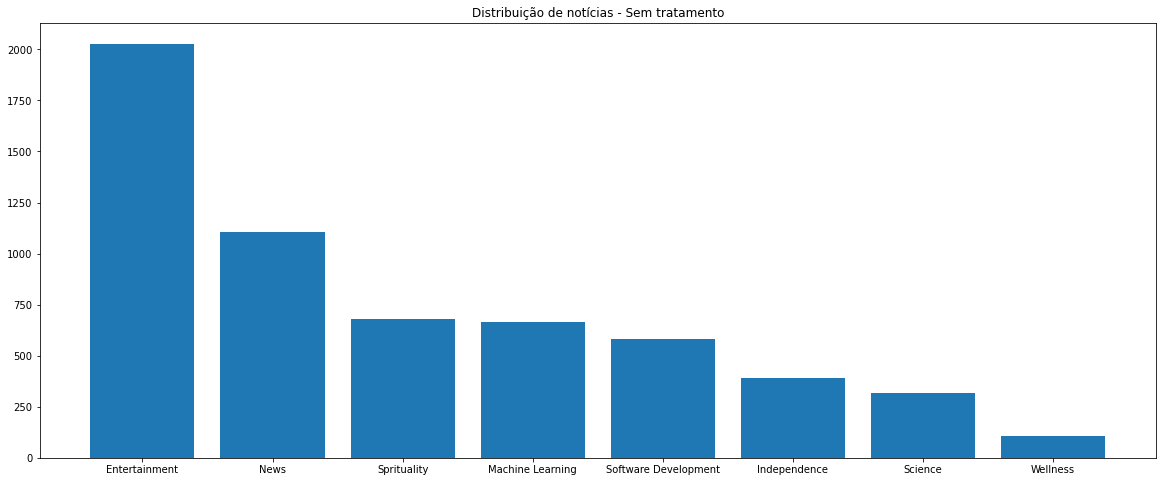

In [9]:
default_topics = df_dados['Topic'].value_counts()
print(default_topics)
plt.figure(figsize=(20, 8))
plt.bar(default_topics.keys(), default_topics.values)
plt.title("Distribuição de notícias - Sem tratamento")
plt.show()
# Reduzir o entertainment

Wordcloud - Sem tratamento - Com stopwords


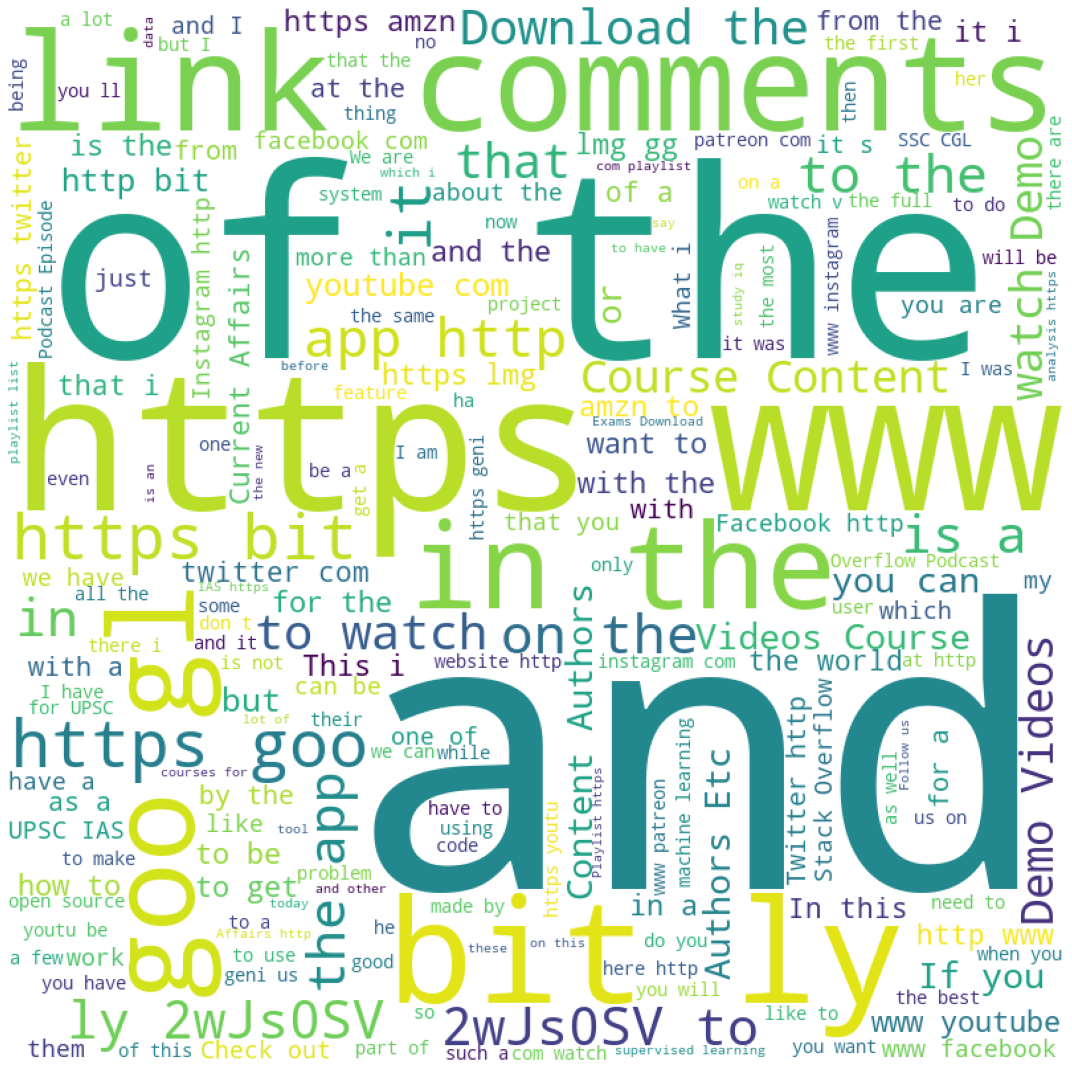

In [10]:
print('Wordcloud - Sem tratamento - Com stopwords')
show_wordcloud(df_dados['title'] + df_dados['c1body'], filter_stopwords=False)

Wordcloud - Sem tratamento - Sem stopwords


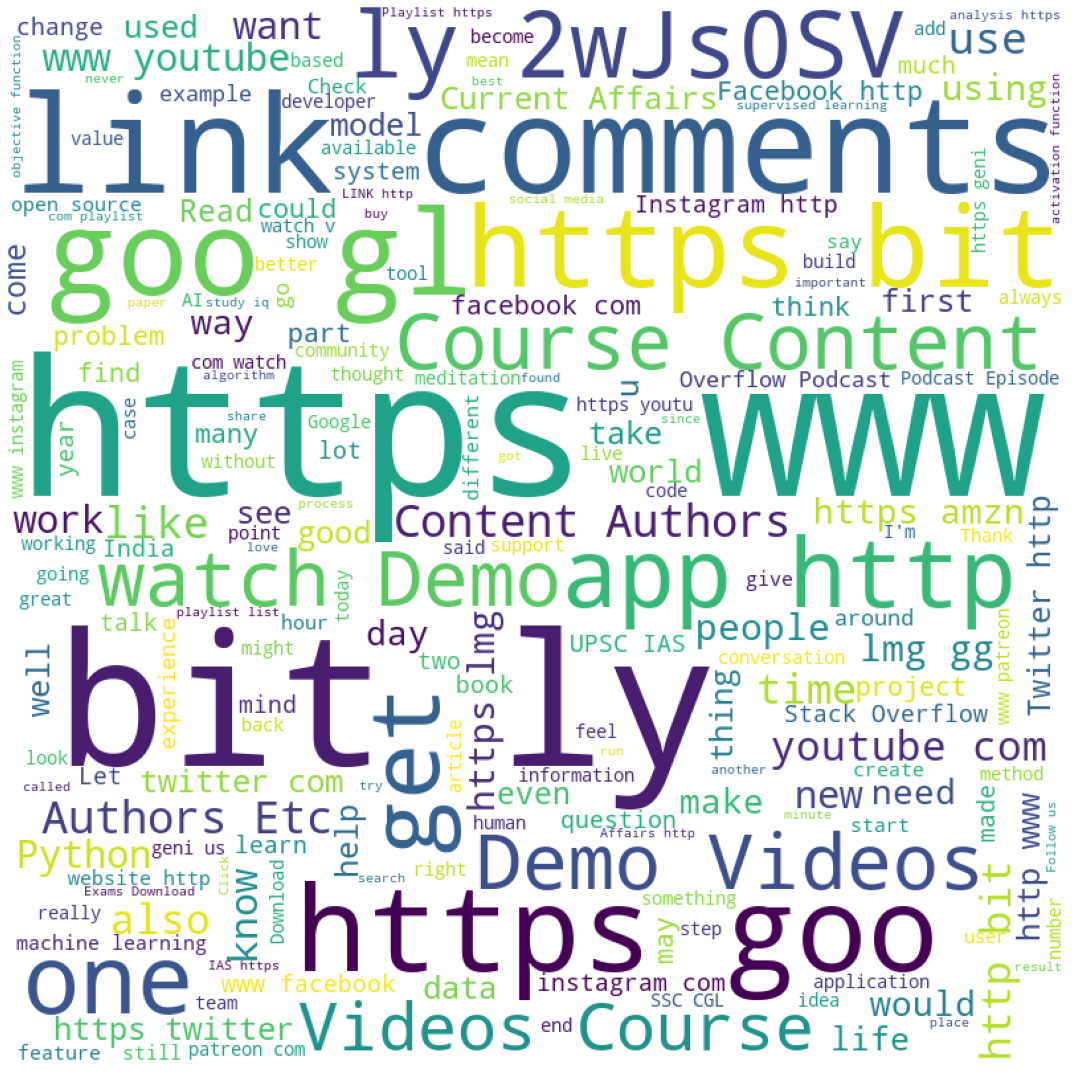

In [11]:
print('Wordcloud - Sem tratamento - Sem stopwords')
show_wordcloud(df_dados['title'] + df_dados['c1body'], filter_stopwords=True)

## Dados após ajustar distribuição com SMOTE

### Reduzir maiores colunas de dados para terceiro maior e depois usar SMOTE

In [12]:
entertainment = df_dados[df_dados['Topic'] == 'Entertainment'].iloc(axis=0)[:678]
news = df_dados[df_dados['Topic'] == 'News'].iloc(axis=0)[:678]
df_dados_2 = df_dados[df_dados['Topic'] != 'Entertainment']
df_dados_2 = df_dados_2[df_dados_2['Topic'] != 'News']
df_dados_2 = pd.concat([df_dados_2, news, entertainment])

### TFIDF

In [13]:
vectorizer = TfidfVectorizer(
  stop_words=STOPWORDS,
	lowercase=True
)

def TFIDF(word_list):
  try:
    tfidf = vectorizer.fit_transform(word_list.apply(str))
  except:
    tfidf = vectorizer.fit_transform(word_list)

  df_tfidf = pd.DataFrame(
    tfidf.toarray(),
    columns=vectorizer.get_feature_names()
  )

  return df_tfidf

In [14]:
result_smote_tfidf = sm.fit_resample(
	TFIDF(df_dados_2['title'] + df_dados_2['c1body']),
	df_dados_2['Topic']
)
df_smote_tfidf = pd.concat([*result_smote_tfidf], axis=1)
df_smote_tfidf

,00,000,000000,0001,00029890,00072,001,0014,00152,00206,...,ఆయ,గభ,దర,రత,లన,షల,ﬁxed,𝙎𝙝𝙖𝙣𝙠𝙖𝙧𝙖𝙘𝙝𝙖𝙧𝙮𝙖,𝙏𝙚𝙢𝙥𝙡𝙚,Topic
0,0.061306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Machine Learning
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sprituality
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Independence
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Science
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Machine Learning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness
5420,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness
5421,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness
5422,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness


In [36]:
df_smote_tfidf.to_feather(path='./smote/tfidf.feather')
for topic in colors:
	data = df_smote_tfidf[df_smote_tfidf['Topic'] == topic]
	data.reset_index().drop(columns=['level_0']).to_feather(path=f'./smote/{topic}/{topic}.feather')

In [37]:
topic = 'Wellness'
test = pd.read_feather(f'./smote/{topic}/{topic}.feather')
test

,00,000,000000,0001,00029890,00072,001,0014,00152,00206,...,ఆయ,గభ,దర,రత,లన,షల,ﬁxed,𝙎𝙝𝙖𝙣𝙠𝙖𝙧𝙖𝙘𝙝𝙖𝙧𝙮𝙖,𝙏𝙚𝙢𝙥𝙡𝙚,Topic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness
674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness
675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness
676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness


Machine Learning        678
Sprituality             678
Independence            678
Science                 678
Software Development    678
Wellness                678
News                    678
Entertainment           678
Name: Topic, dtype: int64


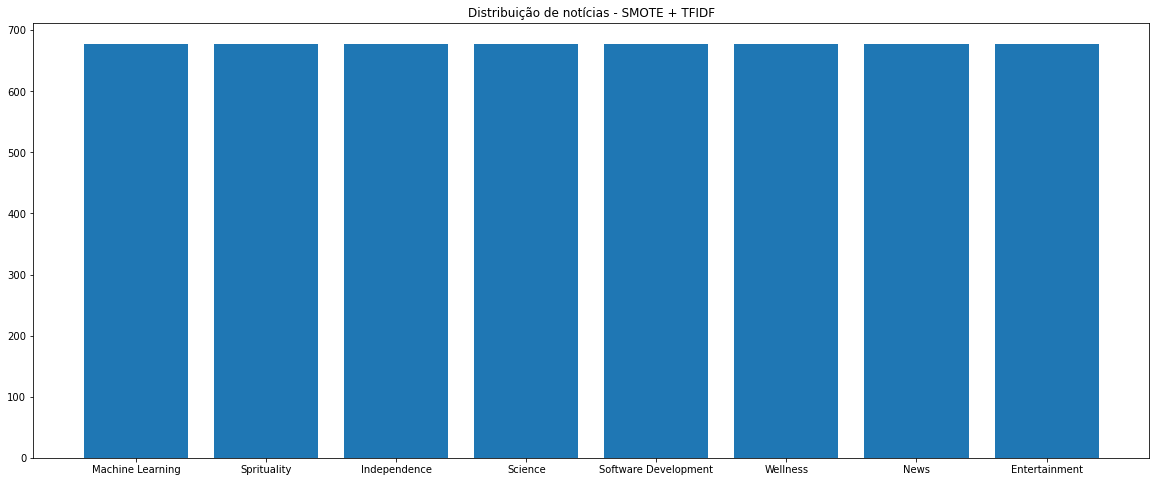

In [16]:
smote_tfidf_topics = df_smote_tfidf['Topic'].value_counts()
print(smote_tfidf_topics)
plt.figure(figsize=(20, 8))
plt.bar(smote_tfidf_topics.keys(), smote_tfidf_topics.values)
plt.title("Distribuição de notícias - SMOTE + TFIDF")
plt.show()

### Bag of Words

In [17]:
count_vectorizer = CountVectorizer(
	lowercase=True, 
)

def BAG_OF_WORDS(word_list: pd.Series):
	try:
		bag = count_vectorizer.fit_transform(word_list.apply(str))
	except:
		bag = count_vectorizer.fit_transform(word_list)

	df_bag = pd.DataFrame(bag.toarray(), columns=count_vectorizer.get_feature_names())
	return df_bag

In [18]:
result_smote_bow = sm.fit_resample(
	BAG_OF_WORDS(df_dados_2['title'] + df_dados_2['c1body']),
	df_dados_2['Topic']
)
df_smote_bow = pd.concat([*result_smote_bow], axis=1)
df_smote_bow

,00,000,000000,0001,00029890,00072,001,0014,00152,00206,...,ఆయ,గభ,దర,రత,లన,షల,ﬁxed,𝙎𝙝𝙖𝙣𝙠𝙖𝙧𝙖𝙘𝙝𝙖𝙧𝙮𝙖,𝙏𝙚𝙢𝙥𝙡𝙚,Topic
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Machine Learning
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sprituality
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Independence
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Science
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Machine Learning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Wellness
5420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Wellness
5421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Wellness
5422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Wellness


In [38]:
df_smote_bow.to_feather(path='./smote/bow.feather')
for topic in colors:
	data = df_smote_bow[df_smote_bow['Topic'] == topic]
	data.reset_index().drop(columns=['level_0']).to_feather(path=f'./smote/BOW/{topic}.feather')

### Word2Vec

In [20]:
def WORD_2_VEC(word_list: pd.Series):
	# TODO
	pass

In [21]:
result_smote_w2v = sm.fit_resample(
	WORD_2_VEC(df_dados_2['title'] + df_dados_2['c1body']),
	df_dados_2['Topic']
)
df_smote_w2v = pd.concat([*result_smote_w2v], axis=1)
df_smote_w2v

ValueError: Expected 2D array, got scalar array instead:
array=None.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df_smote_w2v.to_feather(path='./smote/w2v.feather')

### Bert

In [ ]:
# TODO

# Scatter

In [56]:
def reducao_dimensionalidade(x):
	return TSNE(
		n_components=2,
		init='random',
		verbose=1,
		learning_rate='auto'
	).fit_transform(x)
	return PCA(n_components=2).fit_transform(x)

## TFIDF

In [57]:
plt.figure(figsize=(15, 8))

for topic in colors:
	print(topic)

	data = pd.read_feather(f'./smote/TFIDF/{topic}.feather').drop(columns=['Topic'])
	# print(data.describe())
	dados_reducao_dimensionalidade = reducao_dimensionalidade(data)
	plt.scatter(
		[y[0] for y in dados_reducao_dimensionalidade],
		[y[1] for y in dados_reducao_dimensionalidade],
		color=colors[topic],
		alpha=0.5,
		label=topic
	)

plt.show()


Entertainment
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 678 samples in 0.933s...
[t-SNE] Computed neighbors for 678 samples in 2.676s...
[t-SNE] Computed conditional probabilities for sample 678 / 678
[t-SNE] Mean sigma: 0.280967


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

<Figure size 1080x576 with 0 Axes>